## Modifying initial and boundary conditions

In this file we demonstrate how to change 
* Initial conditions
* Boundary conditions

### Initial and boundary conditions

Two porperties every well posed pde requires are initial and boundary conditions. 
Let us consider a coupled heat diffusion equation
\begin{equation}
C_E\partial_t T_E = k_E\partial^2_x T_E + G(T_L-T_E)
\end{equation}
\begin{equation}
C_L\partial_t T_L = k_L\partial^2_x T_L + G(T_E-T_L)
\end{equation}
Initial conditions are of the form
\begin{align}
    T_E(x,t=0) &= f_E(x) \\ \nonumber
    T_L(x,t=0) &= f_L(x)
\end{align}
Boundary conditions can be of two different types, either \textit{Dirichlet} or \textit{Neumann} type. 
That is fixing either the value of or the flux on the left/ right end of the material under consideration. 

Dirichlet boundary conditions are of the form
\begin{align}
    T_E(x_0,t) &= d_E(t) \qquad\qquad &T_E(x=L,t) &= \tilde{d}_E(t) \\ \nonumber
    T_L(x,t=0) &= d_L(t) \qquad\qquad &T_L(x=L,t) &= \tilde{d}_L(t)
\end{align}
Neumann boundary conditions are of the form
\begin{align}
    \partial_x T_E(x_0,t) &= n_E(t) \qquad\qquad &\partial_x T_E(x=L,t) &= \tilde{n}_E(t) \\ \nonumber
    \partial_x T_L(x,t=0) &= n_L(t) \qquad\qquad &\partial_x T_L(x=L,t) &= \tilde{n}_L(t)
\end{align}


In [3]:
from NTMpy import NTMpy as ntm
from matplotlib import pyplot as plt
import numpy as np

In [4]:
# We define all the material parameters for a 2TM simulation
L  = 1e-5      # Length of the Material
Ce = 2e+4      # Specific Heat Electrons
Cl = 2.5e6     # Specific Heat Lattice
ke = 3.2e+1    # Conductivity Electrons
kl = 2.75      # Conductivity Lattica
G  = 3e+16     # Exchange constant

In [5]:
# If no specific source is indicated the fluence will be 0
s = ntm.source()
#Create a simulation object with two systems.
sim = ntm.simulation(2,s)

In order to modify the initial and the boundary conditions of the equation use the command

`.changeInit(system,function)` where
* `system` is a string or a number: "electron" or "Electron" or 1, "lattice" or "Lattice" or 2 and "spin" or "Spin" or 3
* function is a function $f_E(x)$, $f_L(x)$ or a number.

`.changeBC_Type(system,side,type)` where
* `system` is a string or a number: "electron" or "Electron" or 1, "lattice" or "Lattice" or 2 and "spin" or "Spin" or 3
* `side` is a string: "left" $x = 0$ or "right" $x = L$
* `type` is a string: "dirichlet" or "neumann"

`.changeBC_Value(system,side,function)` where
* `system` is a string or a number: "electron" or "Electron" or 1, "lattice" or "Lattice" or 2 and "spin" or "Spin" or 3
* `side` is a string: "left" $x = 0$ or "right" $x = L$
* `function` is a function (see top). 


In [6]:
# Change initial and boundary conditions 
system1 = 1
system2 = 2
sim.changeInit(system1,lambda x: 600 + 300*np.cos(2*np.pi*x/L))
sim.changeInit(system2,300)
# Define Boundary Conditions
sim.changeBC_Type(system1,"left","neumann")
sim.changeBC_Type(system1,"right","neumann")
sim.changeBC_Type(system2,"left","neumann")
sim.changeBC_Type(system2,"right","neumann")
# Set a value on boundaries
sim.changeBC_Value(system1,"left",0)
sim.changeBC_Value(system1,"right",0)
sim.changeBC_Value(system2,"left",0)
sim.changeBC_Value(system2,"right",0)
# Modify the timestep to see fast dynamics
sim.final_time = 2e-9
sim.time_step  = 1.5e-13
n_index = 1 #no refractive index needed, since no source is applied.
sim.addLayer(L, n_index, [ke, kl], [Ce, Cl], 1, [G])
# Run the simulation
[x, t, Temp_map] = sim.run() 

-----------------------------------------------------------
The maunually chosen time step of 1.50e-13 is very small and will eventually cause a long simulation time.
We suggest a timestep of 1.24e-12 s
-----------------------------------------------------------
-----------------------------------------------------------
No source is applied.
source.fluence = 0
-----------------------------------------------------------


100%|██████████████████████████████████████████████████████████████████████████| 13333/13333 [00:02<00:00, 4540.59it/s]


-----------------------------------------------------------
Heat diffusion in a coupled electron-lattice system has been simulated
Eleapsed time in E.E.- loop: 2.9520208835601807
-----------------------------------------------------------


times of the first plot:	[0.0e+00 1.5e-13 3.0e-13 4.5e-13]


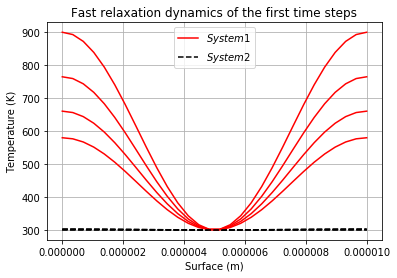

In [7]:
# Plot with the fast time dynamic
print("times of the first plot:\t" + str(t[0:4]))
plt.figure()
plt.title("Fast relaxation dynamics of the first time steps")
plt.xlabel("Surface (m)"); plt.ylabel("Temperature (K)")
plt.plot(x,Temp_map[0][0,:],"r",label = "$System 1$")
plt.plot(x,Temp_map[1][0,:],"k--",label = "$System 2$")
for i in range(1,4):  
    plt.plot(x,Temp_map[0][i,:],"r")
    plt.plot(x,Temp_map[1][i,:],"k--")
plt.legend()
plt.grid()

We can see that the "neumann" boundary conditions have been correctly applied, since the value of the temperature changes but the flux stays constant at 0. 

Now let us change the boundary conditions to "dirichlet type"

In [8]:
sim         = ntm.simulation(2,s)

sim.changeInit(1,lambda x: 300 + np.sin(2*np.pi*x/L))
sim.changeInit(2,300)
# Define Boundary Conditions
sim.changeBC_Type(1,"left","dirichlet")
sim.changeBC_Type(1,"right","dirichlet")
sim.changeBC_Type(2,"left","dirichlet")
sim.changeBC_Type(2,"right","dirichlet")
# Set a value on boundaries
sim.changeBC_Value(1,"left",300)
sim.changeBC_Value(1,"right",300)
sim.changeBC_Value(2,"left",300)
sim.changeBC_Value(2,"right",300)
# Modify the timestep to see fast dynamics
sim.final_time = 2e-9
sim.time_step  = 1.5e-13
sim.addLayer(L,n_index, [ke, kl], [Ce, Cl], 1, [G])
# Run the simulation
[x, t, Temp_map] = sim.run() 

-----------------------------------------------------------
The maunually chosen time step of 1.50e-13 is very small and will eventually cause a long simulation time.
We suggest a timestep of 1.24e-12 s
-----------------------------------------------------------
-----------------------------------------------------------
No source is applied.
source.fluence = 0
-----------------------------------------------------------


100%|██████████████████████████████████████████████████████████████████████████| 13333/13333 [00:02<00:00, 4585.01it/s]


-----------------------------------------------------------
Heat diffusion in a coupled electron-lattice system has been simulated
Eleapsed time in E.E.- loop: 2.939171075820923
-----------------------------------------------------------


times of the first plot:	[0.0e+00 1.5e-13 3.0e-13 4.5e-13]


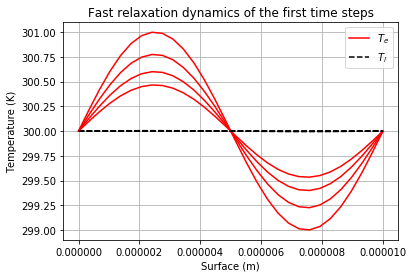

In [9]:
# Plot with the fast time dynamic
print("times of the first plot:\t" + str(t[0:4]))
plt.figure()
plt.title("Fast relaxation dynamics of the first time steps")
plt.xlabel("Surface (m)"); plt.ylabel("Temperature (K)")
plt.plot(x,Temp_map[0][0,:],"r",label = "$T_e$")
plt.plot(x,Temp_map[1][0,:],"k--",label = "$T_l$")
for i in range(1,4):  
    plt.plot(x,Temp_map[0][i,:],"r")
    plt.plot(x,Temp_map[1][i,:],"k--")
plt.legend()
plt.grid()

Now "dirichlet" boundary conditions are applied correctly and the value on the left and on the right end of the material are fixed. 